## Problem Statement
The goal of this migration prediction project is to use machine learning techniques to accurately predict human migration patterns between countries. This information will be valuable in a variety of contexts, including city planning, international trade, disease control, conservation planning, and public policymaking. The outcome of this project will help improve decision making and support the development of evidence-based policies to address the challenges posed by human migration.

## Data
The dataset, I am using in this task to predict migration can be easily downloaded from here:https://github.com/amankharwal/Website-data/blob/master/migration_nz.csv

## Data features
Our data has 5 columns:
* Measure;the arrivals,depature and net of individuals
* Country; the country name of the individuals
* Citizenship: the citizenship of individuals
* Year: the year the individuals arrived,depatured or net
* Value: the number of individuals

We need to turn our attention to the “Measure”, “Country” and “CitizenShip” column. If we want to get a prediction result, we need to convert all of the string values ​​to an integer

## Importing the necessary libraries
We need to import the necessary libraries before we kickstart our project.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB

## Loading our dataset



In [5]:
data = pd.read_csv('/content/drive/MyDrive/filename/migration_nz.csv')
data.head(10)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0


## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset we are working on

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. What are the outliers and why should we care about them?
5. How can we add,change or remove features to get more out of our data?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [7]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
dtype: int64

from our dataset we can see there are 86526 entries with 5 columns and our value column has 72 null values.

But first, let’s see the unique values ​​we have in the “Measure” column:

In [8]:
data['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

Now we need to give each unique string value its unique integer value: in case there are not that many values, it is possible for us to use the “replace” function:

In [9]:
data['Measure'].replace("Arrivals",0,inplace=True)
data['Measure'].replace("Departures",1,inplace=True)
data['Measure'].replace("Net",2,inplace=True)

Now let’s check if everything has been correctly assigned

In [10]:
data['Measure'].unique()

array([0, 1, 2])

In [19]:
# Let's find out how many of each class there
data["Measure"].value_counts()

0    28842
1    28842
2    28842
Name: Measure, dtype: int64

we can infer that they are equally distributed,now lets have some bar graph visualization.

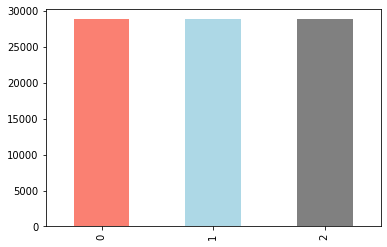

In [21]:
data["Measure"].value_counts().plot(kind="bar",color=["salmon","lightblue","grey"]);

In this case, we have about 250 unique countries:

In [11]:
data['Country'].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

In [22]:
data["Country"].value_counts()

Oceania              342
US Virgin Islands    342
Puerto Rico          342
Paraguay             342
Suriname             342
                    ... 
Greece               342
Croatia              342
Hungary              342
Ireland              342
All countries        342
Name: Country, Length: 253, dtype: int64

Now we need to assign each unique string value its unique integer value:

In [12]:
data['CountryID'] = pd.factorize(data.Country)[0]
data['CitID'] = pd.factorize(data.Citizenship)[0]

Now, let’s see if everything is okay:

In [14]:
data['CountryID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

We had some missing values in our Value column and we can simply fill these missing values with the median values:

In [16]:
data["Value"].fillna(data["Value"].median(),inplace=True)

Now, let’s see if everything is fine so far:

In [17]:
data.isnull().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
CountryID      0
CitID          0
dtype: int64

Now that we have been able to sort our dataset and perform some cleaning,we can further do basic summary statistics: Calculate the mean, median, mode, and range of the data to get a better understanding of the distribution of the migration data.

In [18]:
print(data.describe())


            Measure          Year          Value     CountryID         CitID
count  86526.000000  86526.000000   86526.000000  86526.000000  86526.000000
mean       1.000000   1997.500000     254.457389    126.000000      1.000000
std        0.816501     10.965919    3122.313365     73.034661      0.816501
min        0.000000   1979.000000  -42627.000000      0.000000      0.000000
25%        0.000000   1988.000000       0.000000     63.000000      0.000000
50%        1.000000   1997.500000       0.000000    126.000000      1.000000
75%        2.000000   2007.000000       6.000000    189.000000      2.000000
max        2.000000   2016.000000  127305.000000    252.000000      2.000000


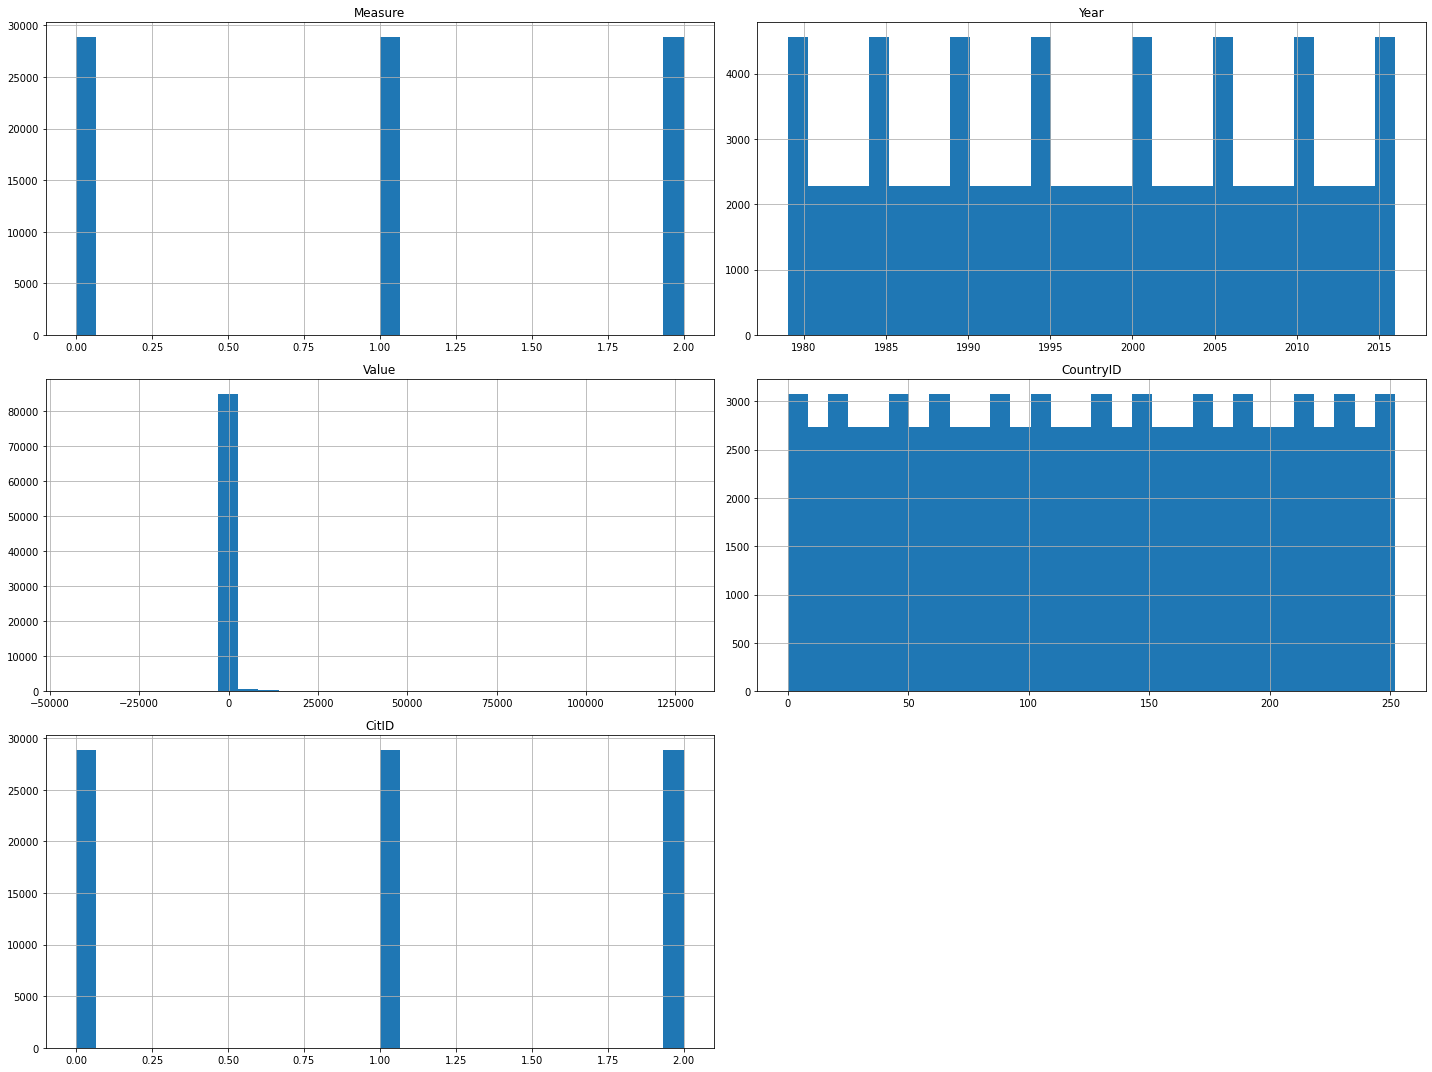

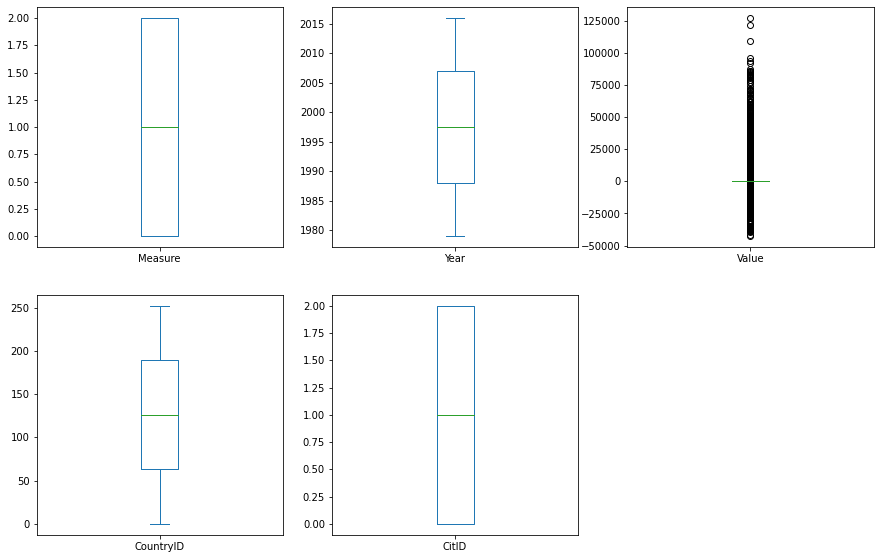

In [25]:

data.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
plt.show()


Correlation Matrix: we plot a correlation matrix to see if there are any strong correlations between variables in the data set.

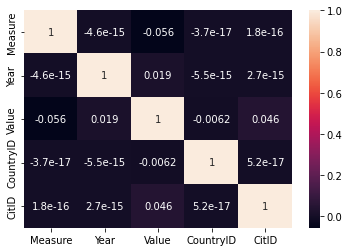

In [27]:
corr = data.corr()
sns.heatmap(corr, annot=True);


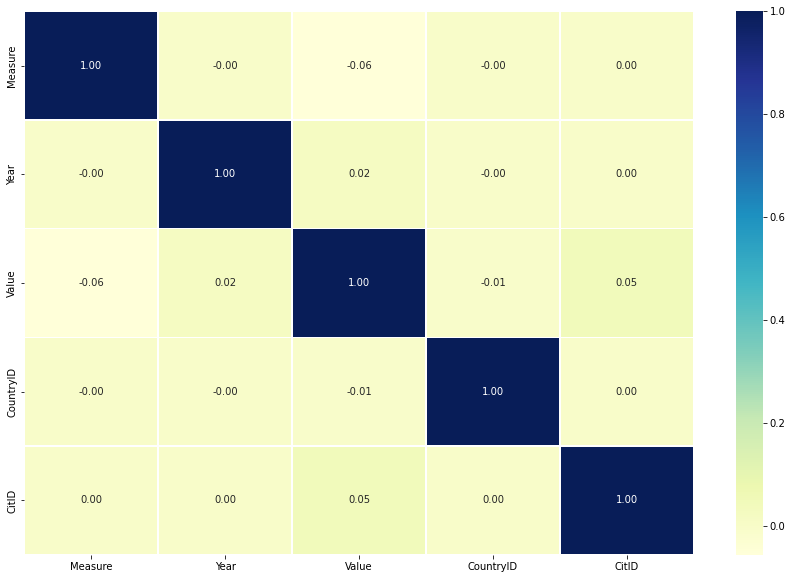

In [28]:
# Let's make our correlation matrix a little prettier
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

## Modelling

## Split The Data into Train and Test sets
Now, I will split the data into 70 per cent training and 30 per cent test set:

In [30]:
data.head()

,Measure,Year,Value,CountryID,CitID
0,0,1979,11817.0,0,0
1,0,1979,4436.0,0,1
2,0,1979,19965.0,0,2
3,0,1979,10.0,1,0
4,0,1979,0.0,1,1


In [33]:
X= data[['CountryID','Measure','Year','CitID']]
Y= data['Value']
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=42)

## Predict Migration
Now, let’s predict migration using our Machine Learning algorithm and visualize the results:

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
rf.fit(X_train ,y_train)
rf.score(X_test, y_test)

0.7378980268362672

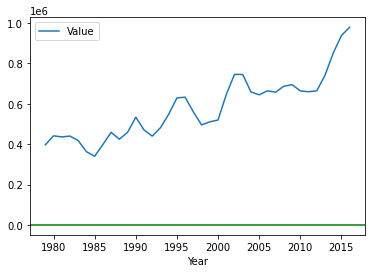

In [36]:
X = data[['CountryID','Measure','Year','CitID']]
Y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)
grouped = data.groupby(['Year']).aggregate({'Value' : 'sum'})


#Growth of migration to New-Zeland by year
grouped.plot(kind='line');plt.axhline(0, color='g')
plt.show()

We can observe that there has been a trend of increasing migration to New Zealand from 1980 to 2015, as evidenced by a growth in the migration population

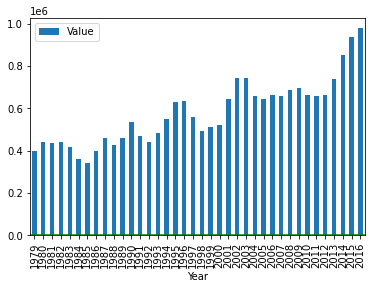

In [38]:
grouped.plot(kind='bar');plt.axhline(0, color='g')
plt.show()

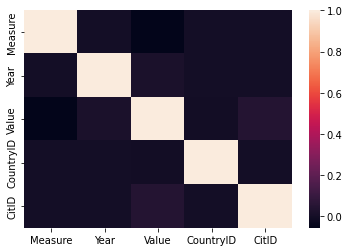

In [39]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90],
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': [2, 3, 4],
}
rf = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 7, 'max_features': 4, 'n_estimators': 70}
Best score:  0.8294777234763933


In [42]:
grid_search.score(X_test,y_test)

0.832435177007042

our model score now has improved from 0.7378980268362672 to 0.8294777234763933.Now let us compare with RandomizedSearchCV.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': randint(3, 8),
    'max_features': randint(2, 5),
}
rf = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best parameters:  {'max_depth': 6, 'max_features': 3, 'n_estimators': 63}
Best score:  0.7918669730169257


In [43]:
random_search.score(X_test,y_test)

0.7908453710510667

## Conclusion
Hyperparameter tuning by GridSearchCV gives us the best outcome.
It can be concluded that the use of machine learning algorithms has proven to be an effective approach for predicting human migrations. In this project, a machine learning model was developed and optimized using hyperparameter tuning to predict migration patterns. The final model, after hyperparameter tuning, achieved a score of 0.832435177007042 on the test data, which indicates that the model is performing well and is able to make accurate predictions about migration patterns.

This result highlights the potential of machine learning in addressing complex problems in the field of migration, and provides valuable insights for city planning, international trade, disease control, conservation efforts, and public policy making. The results of this project can be used as a starting point for further research and development in the area of migration prediction.